<a href="https://colab.research.google.com/github/sergiynesterenko90/feranec/blob/main/notebooks/regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import the necessary libraries

In [204]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [205]:
tf.config.list_physical_devices('GPU')  # check that we actually have a GPU

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

# Get the handwriting dataset

In [206]:
def func(x):
  return 0.2 * x + 0.3
  # return np.sin(10 * x) + 0.3

# training data
N_train = 10
x_train = np.arange(0, 1.01, 1.0 / (N_train-1))
y_train = func(x_train)

# add noise to training data
noise_mu = 0
noise_sigma = 0.3
# y_train += np.random.normal(noise_mu, noise_sigma, size=N_train)

# test data
N_test = 100
x_test = np.arange(0, 1.01, 1.0 / (N_test-1))
y_test = func(x_test)

# Create the Neural Network

In [207]:
model = tf.keras.models.Sequential(
    [
        tf.keras.layers.Flatten(),
     
        # tf.keras.layers.Dense(1000),
        # # tf.keras.layers.Dropout(0.1),
        # tf.keras.layers.LeakyReLU(alpha=0.3),
     
        # tf.keras.layers.Dense(100),
        # # tf.keras.layers.Dropout(0.1),
        # tf.keras.layers.LeakyReLU(alpha=0.3),
     
        # tf.keras.layers.Dense(10),
        # tf.keras.layers.LeakyReLU(alpha=0.3),

        tf.keras.layers.Dense(1),
     
    ]
)

# Show how to make predictions (before training the net)

In [208]:
predictions = model(x_train[:1])
predictions

<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[0.]], dtype=float32)>

# Create the loss function

In [209]:
loss_fn = tf.keras.losses.MeanSquaredError()

In [210]:
loss_fn(y_train[:1], predictions)

<tf.Tensor: shape=(), dtype=float32, numpy=0.09>

# Choose the optimizer and select the model

In [211]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-2)

model.compile(optimizer=optimizer, loss=loss_fn, metrics=["mse"], jit_compile=True)

# Train the model

In [212]:
epochs = 1000
val_freq = int(epochs / 10)

history = model.fit(
    x_train, 
    y_train, 
    # validation_data=(x_test, y_test), 
    # validation_freq=val_freq,
    epochs=epochs,
    batch_size=1000,
  )

Epoch 1/1000
1/1 [==============================] - 0s 498ms/step - loss: 0.0948 - mse: 0.0948
Epoch 2/1000
1/1 [==============================] - 0s 7ms/step - loss: 0.0892 - mse: 0.0892
Epoch 3/1000
1/1 [==============================] - 0s 7ms/step - loss: 0.0841 - mse: 0.0841
Epoch 4/1000
1/1 [==============================] - 0s 7ms/step - loss: 0.0796 - mse: 0.0796
Epoch 5/1000
1/1 [==============================] - 0s 7ms/step - loss: 0.0755 - mse: 0.0755
Epoch 6/1000
1/1 [==============================] - 0s 7ms/step - loss: 0.0719 - mse: 0.0719
Epoch 7/1000
1/1 [==============================] - 0s 7ms/step - loss: 0.0688 - mse: 0.0688
Epoch 8/1000
1/1 [==============================] - 0s 7ms/step - loss: 0.0661 - mse: 0.0661
Epoch 9/1000
1/1 [==============================] - 0s 7ms/step - loss: 0.0639 - mse: 0.0639
Epoch 10/1000
1/1 [==============================] - 0s 7ms/step - loss: 0.0620 - mse: 0.0620
Epoch 11/1000
1/1 [==============================] - 0s 7ms/step - 

dict_keys(['loss', 'mse'])


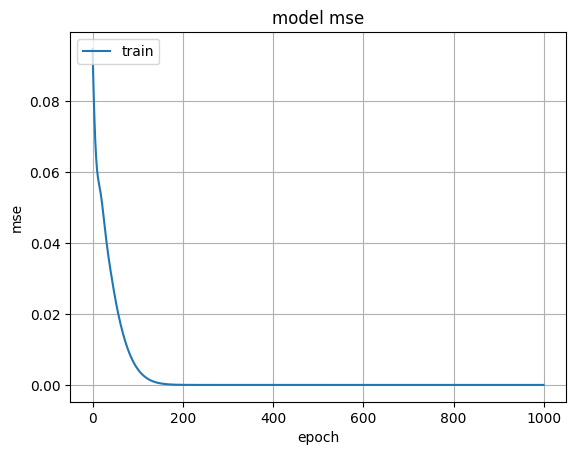

In [213]:
print(history.history.keys())

plt.plot(np.arange(0, epochs), history.history['mse'])
if 'val_mse' in history.history:
  plt.plot(np.arange(0, epochs, val_freq), history.history['val_mse'])
plt.title('model mse')
plt.ylabel('mse')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.grid()
plt.show()

# Evaluate loss against the test dataset

In [214]:
eval = model.evaluate(x_test, y_test, verbose=2)
for name, ev in zip(model.metrics_names, eval):
    print(name, ev)

4/4 - 0s - loss: 6.7502e-16 - mse: 6.7502e-16 - 209ms/epoch - 52ms/step
loss 6.750155905017657e-16
mse 6.750155905017657e-16


# Plot the model and training data

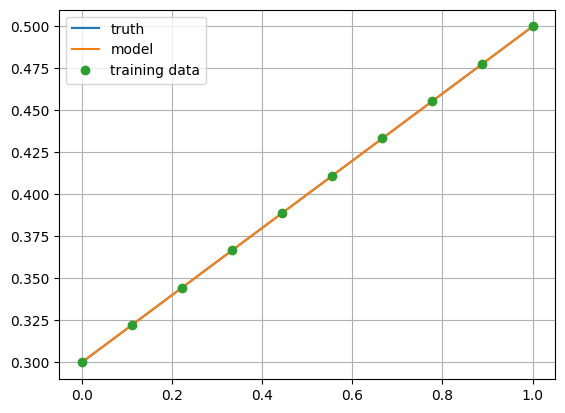

In [215]:
plt.plot(x_test, y_test)
plt.plot(x_test, model(x_test))
plt.plot(x_train, y_train, 'o')
plt.legend(['truth', 'model', 'training data'])
plt.grid()
plt.show()

# Get a summary of the model

In [216]:
model.summary()

for v in model.trainable_variables:
  print(v)


Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_16 (Flatten)        (None, 1)                 0         
                                                                 
 dense_40 (Dense)            (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________
<tf.Variable 'dense_40/kernel:0' shape=(1, 1) dtype=float32, numpy=array([[0.19999993]], dtype=float32)>
<tf.Variable 'dense_40/bias:0' shape=(1,) dtype=float32, numpy=array([0.30000004], dtype=float32)>
